In [2]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import scipy.stats as sc

In [30]:
df = pd.read_csv('US_Accidents_March23.csv')

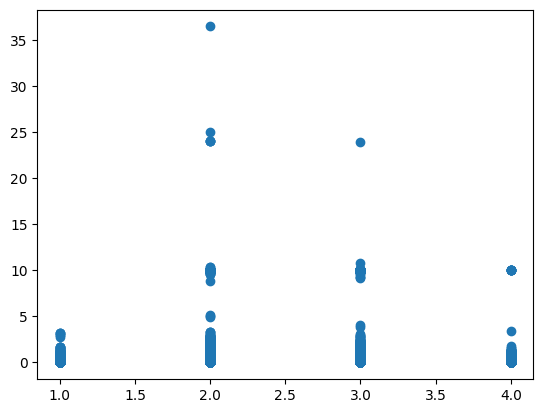

In [4]:
sevdf = df["Severity"]
#df = df.drop("Severity", axis = 1)
x = sevdf
y = df["Precipitation(in)"]
plt.plot(x, y, 'o')
plt.show()

In [35]:
"""import sklearn.linear_model as lm

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
x = x.to_numpy()
x = x.reshape(-1,1)
linear_model.fit(x,y)
y_hat = linear_model.predict(x)
plt.plot(x,y,'o')
plt.plot(x,y_hat,'r')"""

"import sklearn.linear_model as lm\n\nfrom sklearn.linear_model import LinearRegression\n\nlinear_model = LinearRegression()\nx = x.to_numpy()\nx = x.reshape(-1,1)\nlinear_model.fit(x,y)\ny_hat = linear_model.predict(x)\nplt.plot(x,y,'o')\nplt.plot(x,y_hat,'r')"

In [35]:
cond = df

# Reset index while extrapolating Severity values into lists
cond_lists = cond.groupby("Weather_Condition")["Severity"].apply(list).reset_index()

# Compare unique weather conditions
conditions = cond_lists['Weather_Condition'].unique()

pval = []

for i in range(len(conditions)):
    condition1 = conditions[i]

    # Extract severity values list for condition1
    severity1 = cond_lists.loc[cond_lists['Weather_Condition'] == condition1, 'Severity'].values[0]

    for j in range(i + 1, len(conditions)):
        condition2 = conditions[j]

        # Extract severity values list for condition2
        severity2 = cond_lists.loc[cond_lists['Weather_Condition'] == condition2, 'Severity'].values[0]

        # Perform t-test
        _, p = sc.ttest_ind(severity1, severity2, nan_policy='omit')

        alpha = 0.05

        # Checks statistical significance (if p < 0.05)
        if p < alpha:
            #print(f"T-test between {condition1} and {condition2}:")
            #print(f"P-value: {p}")
            #print()
            # Append values to list to print later
            pval.append(p)

# Print first 5 values of sorted list
pval.sort()
print(f"{pval[:5]}")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


TypeError: unsupported operand type(s) for %: 'list' and 'float'